In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import tensorflow as tf

In [55]:
tf.__version__

'2.6.0'

In [56]:
tf.keras.__version__

'2.6.0'

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
mnist = tf.keras.datasets.mnist

In [59]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [60]:
X_test.shape

(10000, 28, 28)

In [61]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [62]:
y_train.shape

(55000,)

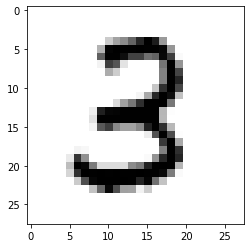

In [63]:
plt.imshow(X_train[11], cmap ='binary')

In [64]:
y_train[11]

3

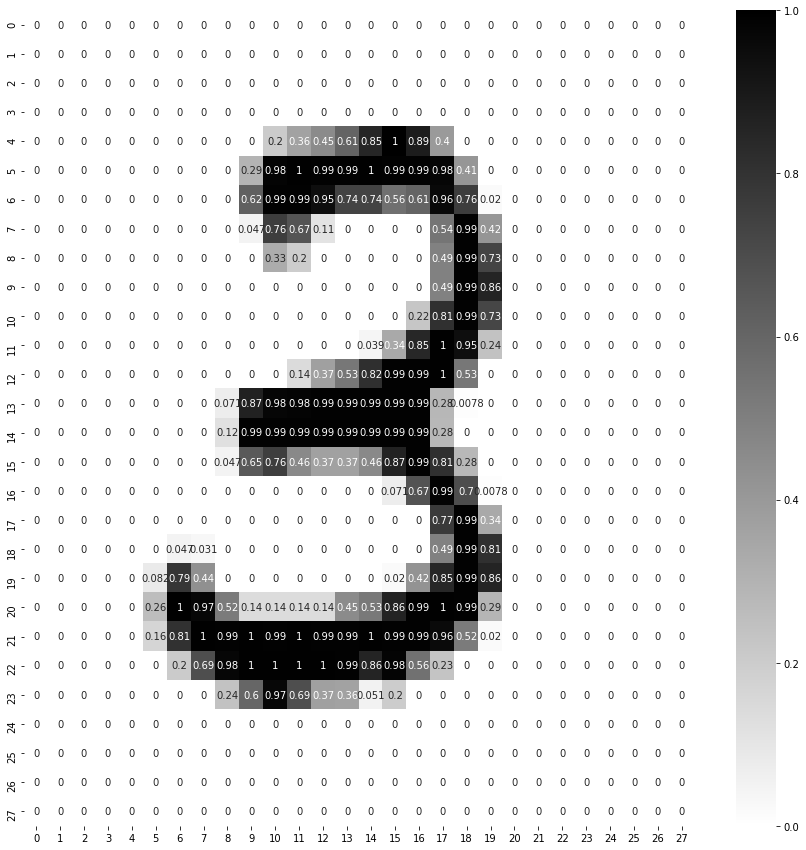

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[11], annot=True ,cmap = 'binary')

In [66]:
Layers = [tf.keras.layers.Flatten(input_shape=(28,28), name='input_layer'),
          tf.keras.layers.Dense(300, activation='relu', name='1st_hidden_layer'),
          tf.keras.layers.Dense(100, activation='relu', name='2nd_hidden_layer'),
          tf.keras.layers.Dense(10, activation='softmax', name='output_layer')]

In [67]:
model = tf.keras.models.Sequential(Layers)

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
1st_hidden_layer (Dense)     (None, 300)               235500    
_________________________________________________________________
2nd_hidden_layer (Dense)     (None, 100)               30100     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.layers

In [70]:
model.layers[1].name

'1st_hidden_layer'

In [71]:
hidden1 = model.get_layer('1st_hidden_layer')

In [72]:
Wh1,Bh1 = hidden1.get_weights()

In [73]:
Wh1.shape

(784, 300)

In [74]:
Bh1.shape

(300,)

In [75]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'SGD',
              metrics = ['accuracy'])

In [76]:
Epochs = 30
validation_set = (X_valid, y_valid)
history = model.fit(X_train, y_train, validation_data=validation_set, epochs= Epochs)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5968 - accuracy: 0.8460 - val_loss: 0.3152 - val_accuracy: 0.9104
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2867 - accuracy: 0.9179 - val_loss: 0.2409 - val_accuracy: 0.9322
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2338 - accuracy: 0.9345 - val_loss: 0.2074 - val_accuracy: 0.9418
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1999 - accuracy: 0.9435 - val_loss: 0.1767 - val_accuracy: 0.9510
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1757 - accuracy: 0.9499 - val_loss: 0.1576 - val_accuracy: 0.9548
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1562 - accuracy: 0.9555 - val_loss: 0.1452 - val_accuracy: 0.9598
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1409 - accuracy: 0.9597 - val_loss: 0.1320 - val_accuracy:

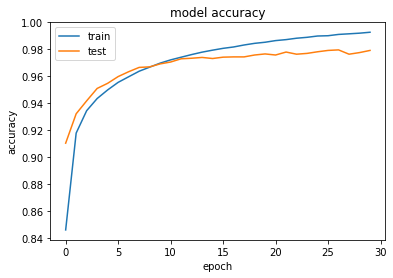

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()